# Linear Regression with Polynomial features

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

Polynomial Features expands the dataset: 
#### what exactly means expanding?
 So, it provides interactive information between existing features linear models can only capture additive effects it cannot capture multiplicative effects on it's own

In [88]:
experience = [19, 14, 6, 6, 13, 19, 8, 2, 1, 15, 1, 5, 16, 19, 4, 3, 17, 17, 12, 14, 6, 3, 9, 5, 17, 14, 3, 1, 20, 1, 3, 18, 10, 3, 8, 14, 18, 15, 2, 10, 2, 17, 8, 1, 9, 11, 16, 7, 10, 3, 18, 13, 7, 4, 13, 20, 1, 8, 14, 16, 14, 12, 19, 15, 2, 2, 19, 17, 20, 10, 6, 15, 11, 5, 1, 8, 12, 12, 5, 7, 4, 6, 13, 20, 15, 3, 8, 20, 16, 13, 18, 10, 19, 17, 19, 5, 9, 12, 1, 1]

skill = [2, 6, 9, 8, 5, 1, 7, 5, 6, 7, 3, 10, 3, 5, 6, 9, 5, 1, 4, 5, 10, 10, 5, 7, 4, 1, 5, 7, 10, 10, 6, 5, 4, 2, 4, 10, 10, 3, 10, 1, 8, 5, 4, 8, 7, 2, 1, 4, 8, 2, 3, 1, 1, 3, 5, 3, 1, 1, 8, 10, 2, 3, 2, 3, 7, 1, 10, 8, 10, 10, 10, 2, 3, 9, 7, 4, 10, 5, 2, 8, 4, 9, 5, 9, 4, 10, 5, 9, 8, 3, 1, 3, 4, 2, 1, 7, 8, 7, 5, 1]

salary = [74766, 97548, 76326, 70264, 84414, 59372, 74821, 33296, 34952, 113609, 21095, 74903, 73728, 109865, 46396, 55198, 102590, 55724, 69635, 86395, 82492, 62304, 67486, 56575, 88264, 48502, 38319, 35217, 180782, 48455, 44635, 104850, 63577, 24390, 52143, 136884, 167140, 72670, 52395, 39096, 46995, 102438, 53492, 41555, 82136, 50222, 52167, 50616, 93062, 25156, 83764, 44565, 29709, 33982, 83945, 90294, 14133, 32156, 119234, 151238, 56732, 59234, 74914, 72205, 40750, 18635, 174080, 137145, 178953, 110539, 82960, 62324, 58801, 69042, 35697, 53676, 123191, 79217, 30416, 76993, 38842, 76681, 82717, 166540, 82076, 62236, 60445, 167386, 131719, 64019, 57388, 53856, 97365, 65499, 60180, 57010, 89398, 95216, 28824, 14655]


In [89]:
np.random.seed(42)

In [90]:
x=pd.DataFrame({"experience":experience,"skill":skill})
y=pd.DataFrame({"salary":salary})

In [91]:
x0train,x0test,y0train,y0test=train_test_split(x,y,train_size=0.7,random_state=42)

In [92]:
model0=LinearRegression()
model0.fit(x0train,y0train) 

LinearRegression()

In [93]:
predict0=model0.predict(x0test)

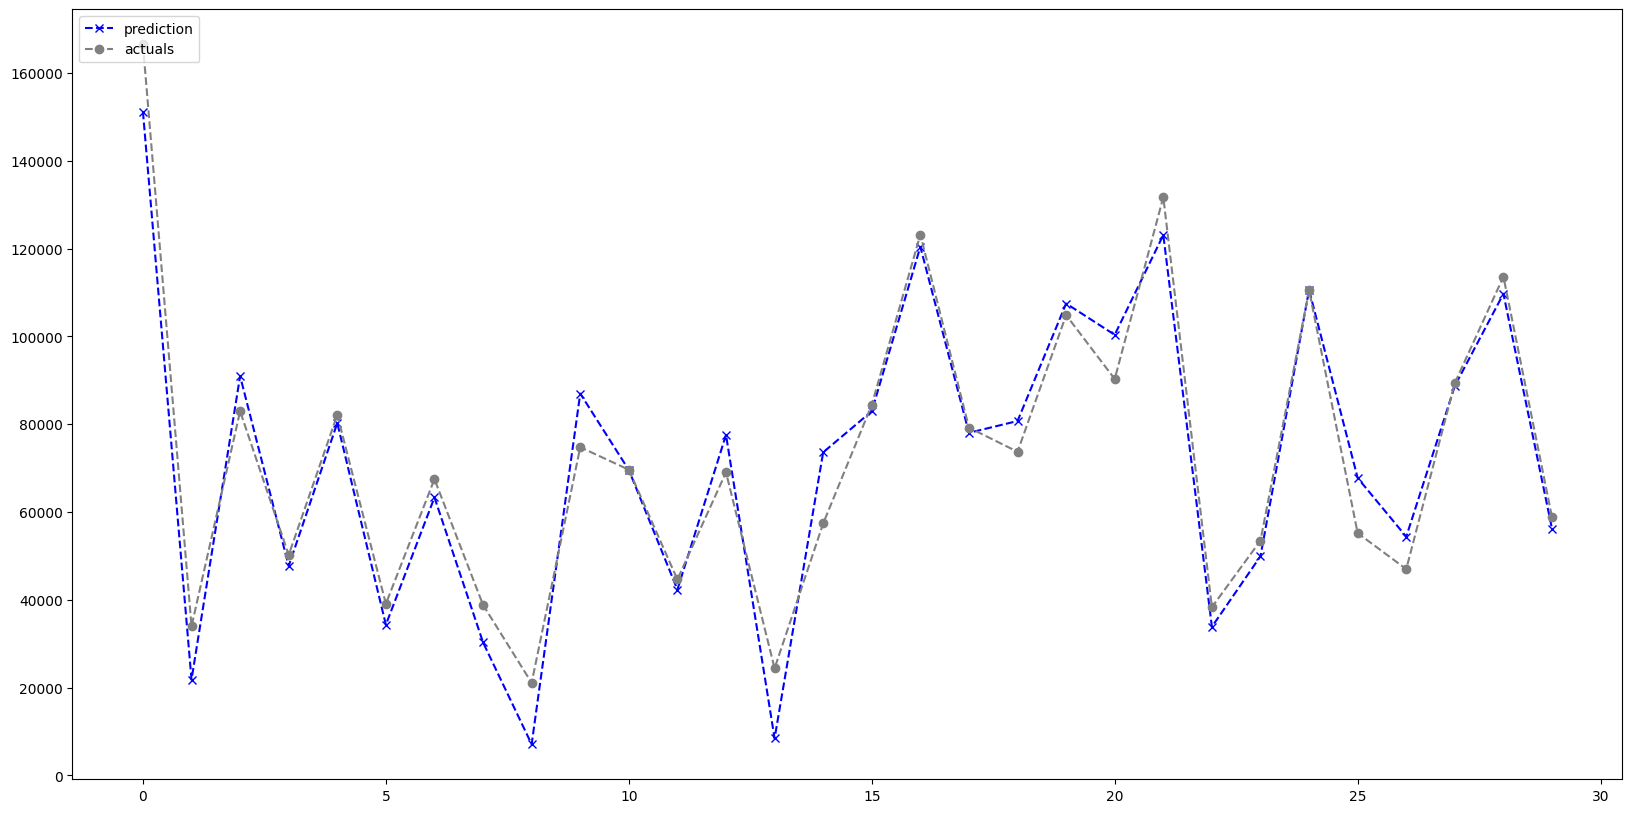

In [94]:
plt.figure(figsize=(20,10))
plt.plot(predict0,linestyle='--',color='blue',marker='x',label='prediction')
plt.plot(y0test.reset_index(drop=True),linestyle='--',color='grey',marker='o',label='actuals')
plt.legend(loc="upper left")
plt.show()

In [95]:
x

,experience,skill
0,19,2
1,14,6
2,6,9
3,6,8
4,13,5
...,...,...
95,5,7
96,9,8
97,12,7
98,1,5


Manual Featuring

In [96]:
x["experience_skill"]=x["experience"]*x["skill"]
x["experience_squared"]=x["experience"]**2
x["skill_squared"]=x["skill"]**2

In [97]:
x

,experience,skill,experience_skill,experience_squared,skill_squared
0,19,2,38,361,4
1,14,6,84,196,36
2,6,9,54,36,81
3,6,8,48,36,64
4,13,5,65,169,25
...,...,...,...,...,...
95,5,7,35,25,49
96,9,8,72,81,64
97,12,7,84,144,49
98,1,5,5,1,25


In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [99]:
x_train.shape

(70, 5)

In [100]:
y_train.shape

(70, 1)

In [101]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [102]:
predictions=model1.predict(x_test)

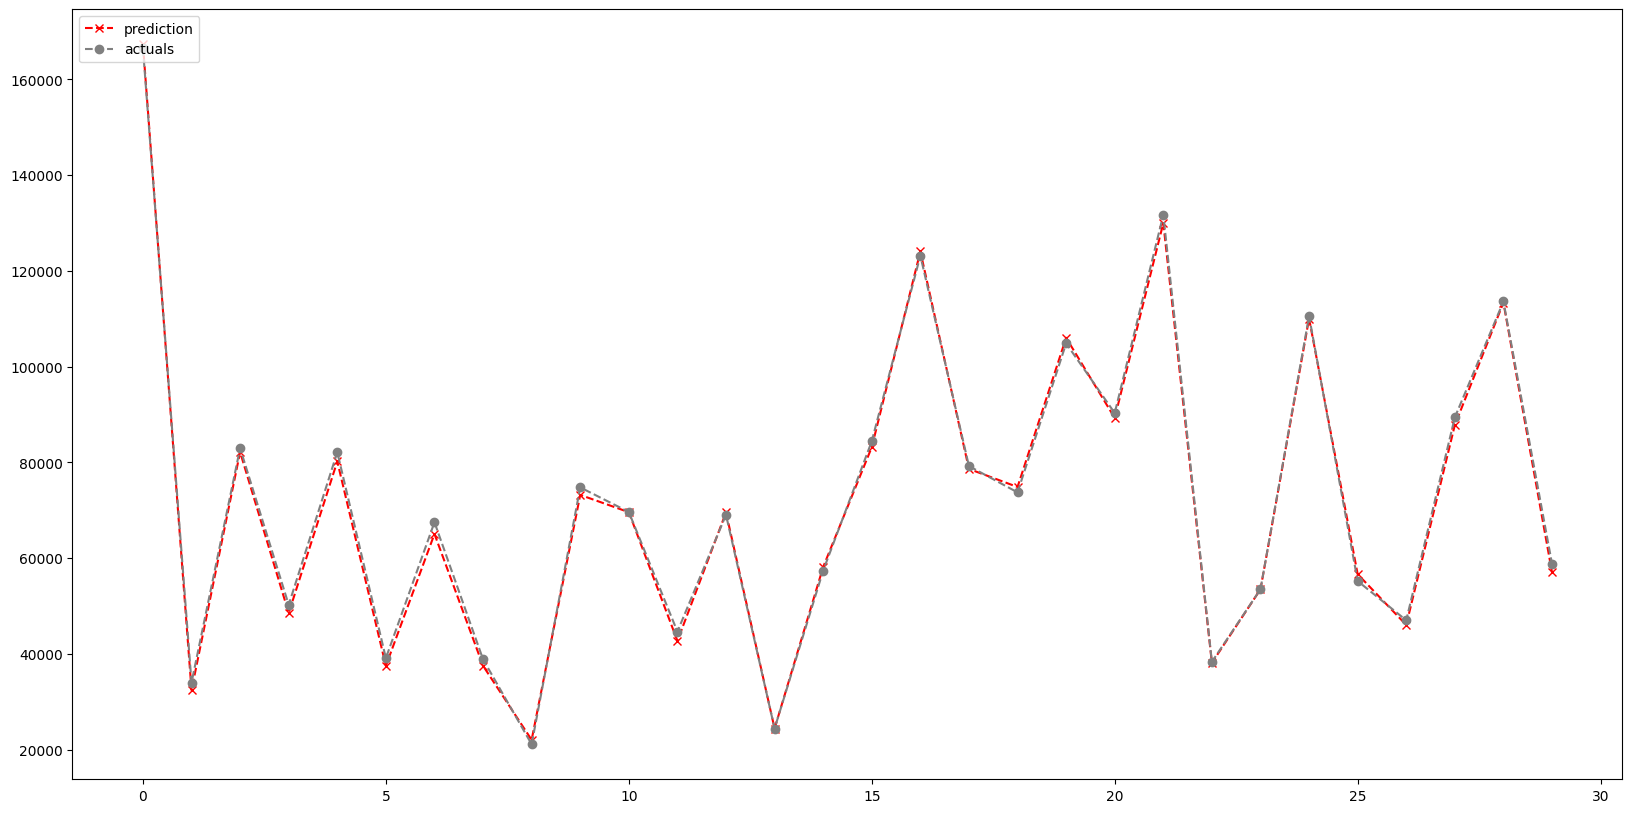

In [103]:
plt.figure(figsize=(20,10))
plt.plot(predictions,linestyle='--',color='red',marker='x',label='prediction')
plt.plot(y_test.reset_index(drop=True),linestyle='--',color='grey',marker='o',label='actuals')
plt.legend(loc="upper left")
plt.show()

In [104]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(x_train, y_train)
poly_predictions = poly_model.predict(x_test)


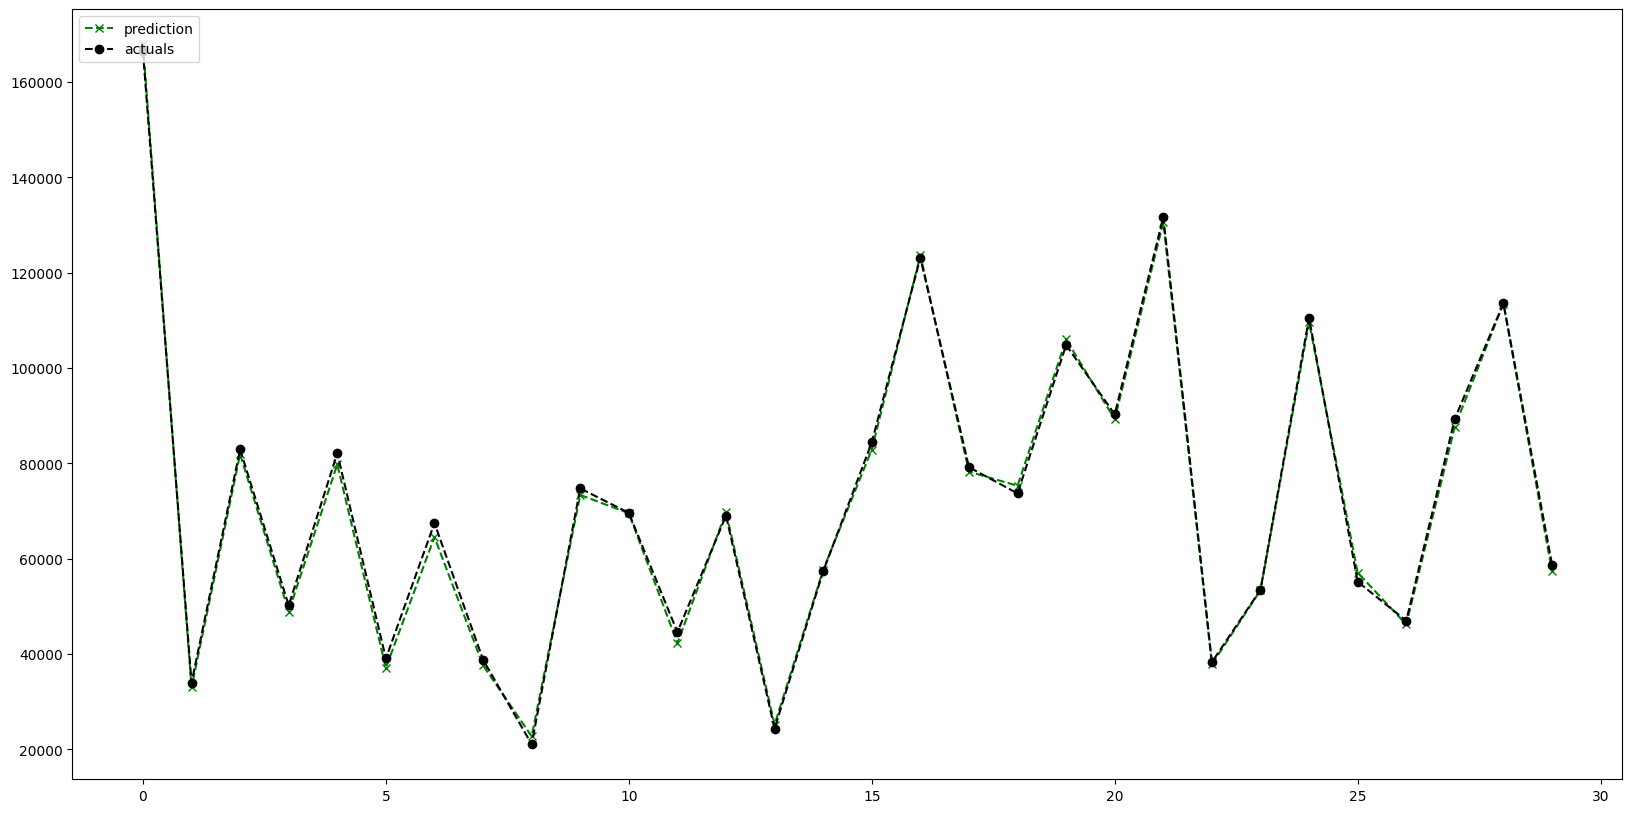

In [112]:
plt.figure(figsize=(20,10))
plt.plot(poly_predictions,linestyle='--',color='green',marker='x',label='prediction')
plt.plot(y_test.reset_index(drop=True),linestyle='--',color='black',marker='o',label='actuals')
plt.legend(loc="upper left")
plt.show()

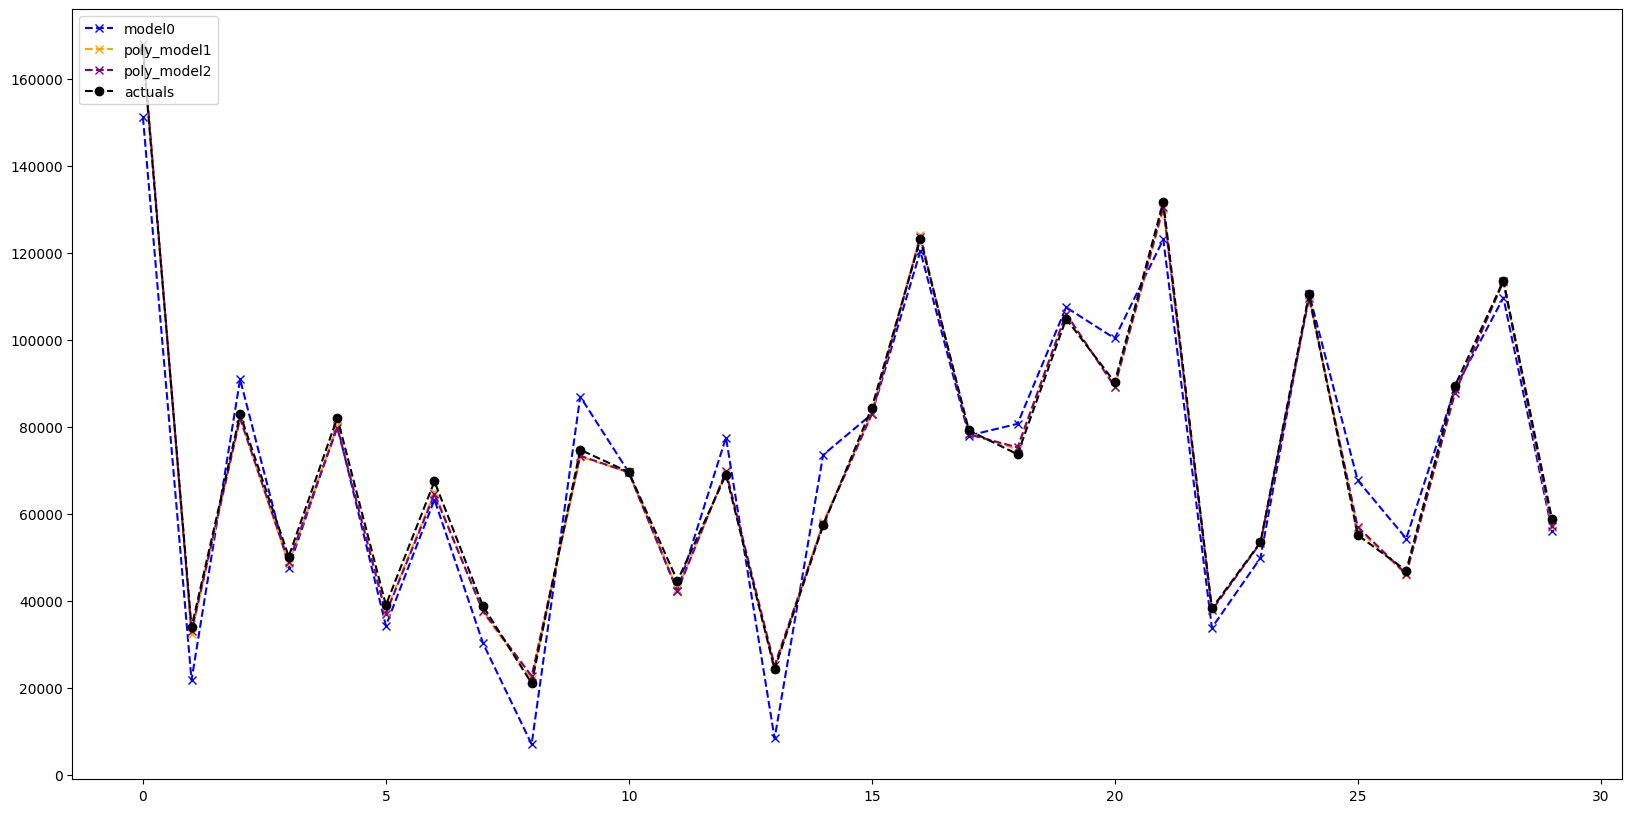

In [120]:
plt.figure(figsize=(20,10))
plt.plot(predict0,linestyle='--',color='blue',marker='x',label='model0')
plt.plot(predictions,linestyle='--',color='orange',marker='x',label='poly_model1')
plt.plot(poly_predictions,linestyle='--',color='purple',marker='x',label='poly_model2')
plt.plot(y_test.reset_index(drop=True),linestyle='--',color='black',marker='o',label='actuals')
plt.legend(loc="upper left")
plt.show()

In [107]:
y0test["salary"].shape

(30,)

In [108]:
predict0.flatten().shape

(30,)

In [109]:
pd.DataFrame({"model0_predictions":predict0.flatten(),"model1_predictions":predictions.flatten(),"model2_predictions":poly_predictions.flatten(),"actual_value":y_test["salary"].reset_index(drop=True)})

,model0_predictions,model1_predictions,model2_predictions,actual_value
0,151207.627739,167351.864987,167939.629720,166540
1,21824.853262,32423.735696,33058.839634,33982
2,90961.492858,82146.401403,81961.392167,82960
3,47710.817280,48517.451299,48939.147595,50222
4,80264.659833,80196.345249,79804.638182,82136
5,34328.014596,37477.582726,37125.707057,39096
6,63316.246142,65038.830088,64566.781862,67486
7,30299.060108,37488.343983,37640.111282,38842
8,7099.065749,22010.574208,22776.812580,21095
9,86979.583981,73195.760681,73394.420100,74766


In [110]:
print("RMSE of model without using polynomial Featuring: ",root_mean_squared_error(predict0,y0test))
print("RMSE of model using manual Polynomial Featuring:",root_mean_squared_error(predictions,y_test))
print("RMSE of model using predefined Polynomial Featuring:",root_mean_squared_error(poly_predictions,y_test))

RMSE of model without using polynomial Featuring:  8206.271102715396
RMSE of model using manual Polynomial Featuring: 1251.9511442341513
RMSE of model using predefined Polynomial Featuring: 1363.0608200985844


In [111]:
print("Accuracy of model0:",model0.score(x0test,y0test))
print("Accuracy of model1:",model1.score(x_test,y_test))
print("Accuracy of model2:",poly_model.score(x_test,y_test))

Accuracy of model0: 0.938787580586639
Accuracy of model1: 0.9985753027446194
Accuracy of model2: 0.9983111997134939


Inducing polynomial features improves model performance, but I've noticed that manually engineered polynomial features produce slightly better results than predefined ones, even when both use a degree of 2. I'm not sure why this difference occurs.